In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab/mnist

/content/drive/My Drive/Colab/mnist


In [0]:
import pandas as pd
import numpy as np

In [0]:
data_train = pd.read_csv("mnist_train.csv")
data_test = pd.read_csv("mnist_test.csv")

In [0]:
data_train = data_train.to_numpy()
data_test = data_test.to_numpy()

In [0]:
X_train,y_train = data_train[:,1:],data_train[:,0]
X_test,y_test = data_test[:,1:],data_test[:,0]

In [0]:
import matplotlib.pyplot as plt

In [0]:
def normalize_image(train_img,test_img):
    m,N = train_img.shape
    mean = np.sum(train_img)/(m*N)
    std = np.sqrt(np.sum((train_img-mean)**2)/(m*N))
    train_img = (train_img-mean)/std
    test_img = (test_img-mean)/std
    return train_img,test_img

In [0]:
def add_one(X):
    return np.c_[X,np.ones((X.shape[0],1))]

In [0]:
def one_hot(labels):
    eye = np.eye(10)
    return eye[labels]

In [0]:
def feed_forward(X,W):
    z = X@W
    exp_matrix = np.exp(z-np.max(z,axis = 1,keepdims = True))
    return exp_matrix/np.sum(exp_matrix,axis = 1, keepdims = True)

In [0]:
def cost_function(y_hat,y):
    m = y_hat.shape[0]
    return -(np.sum(y*np.log(y_hat)))/m

In [0]:
def get_grad(X,y_hat,y):
    m = X.shape[0]
    w_grad = (X.T)@(y_hat-y)/m
    return w_grad

    

In [0]:
def confusion_matrix(y_hat,test_y):
    y_hat = np.argmax(y_hat,axis = 1)
    test_y = np.argmax(test_y,axis = 1)
    confusion_mat  = np.zeros((10,10))
    for i in range(10):
        y_pred = (y_hat == i).astype(int)
        m = np.sum(y_pred)
        for j in range(10):
            y_label = (test_y == j).astype(int)
            confusion_mat[i,j] = np.sum(y_pred*y_label)/m
    return confusion_mat

In [0]:
def update_weights(w,w_grad,learning_rate):
    w = w - learning_rate*w_grad
    return w

In [0]:
def update_momentum(w,w_grad,learning_rate,momentum,momentum_rate):
  momentum = momentum_rate*momentum + learning_rate*w_grad
  w = w - momentum
  return w

In [0]:
def plot_loss(all_loss):
    plt.plot(all_loss)

In [0]:
X_train,X_test = normalize_image(X_train,X_test)

In [0]:
X_train,X_test = add_one(X_train), add_one(X_test)

In [131]:
y_train = one_hot(y_train.astype('int32').flatten().tolist())
y_test = one_hot(y_test.astype('int32').flatten().tolist())
y_train.shape

(59999, 10)

In [0]:
epochs = 1000
learning_rate = 0.1
momentum_rate = 0.9
W = np.random.randn(X_train.shape[1],10)
all_loss = []
momentum = np.zeros_like(W)

Epoch 1: loss is 42.74447
Epoch 11: loss is 24.64755
Epoch 21: loss is 15.57127
Epoch 31: loss is 11.63713
Epoch 41: loss is 9.45131
Epoch 51: loss is 8.06730
Epoch 61: loss is 7.11327
Epoch 71: loss is 6.41508
Epoch 81: loss is 5.88080
Epoch 91: loss is 5.45920
Epoch 101: loss is 5.11746
Epoch 111: loss is 4.83367
Epoch 121: loss is 4.59373
Epoch 131: loss is 4.38801
Epoch 141: loss is 4.20945
Epoch 151: loss is 4.05284
Epoch 161: loss is 3.91414
Epoch 171: loss is 3.79018
Epoch 181: loss is 3.67853
Epoch 191: loss is 3.57735
Epoch 201: loss is 3.48522
Epoch 211: loss is 3.40096
Epoch 221: loss is 3.32359
Epoch 231: loss is 3.25227
Epoch 241: loss is 3.18627
Epoch 251: loss is 3.12494
Epoch 261: loss is 3.06776
Epoch 271: loss is 3.01426
Epoch 281: loss is 2.96407
Epoch 291: loss is 2.91685
Epoch 301: loss is 2.87232
Epoch 311: loss is 2.83020
Epoch 321: loss is 2.79029
Epoch 331: loss is 2.75237
Epoch 341: loss is 2.71627
Epoch 351: loss is 2.68184
Epoch 361: loss is 2.64895
Epoch 37

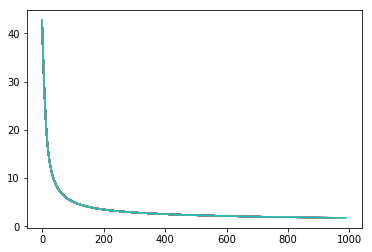

In [133]:
for epoch in range(epochs):
    y_hat = feed_forward(X_train,W)
    loss = cost_function(y_hat,y_train)
    w_grad = get_grad(X_train,y_hat,y_train)
    W = update_momentum(W,w_grad,learning_rate,momentum,momentum_rate)
    all_loss.append(loss)
    if epoch % 10 == 0:
        plot_loss(all_loss)
        print("Epoch %d: loss is %.5f" % (epoch+1, loss))

In [0]:
y_hat = feed_forward(X_test,W)

In [146]:
np.sum(np.argmax(y_hat,axis = 1) == np.argmax(y_test,axis = 1))/(y_test.shape[0])

0.8573857385738574